## Task 1 : import packages and load file

In [69]:
import pandas as pd
import os
import datetime
import matplotlib.pyplot as plt
import numpy as np

In [2]:
path = 'D:\Data Analyst\Python Project\Sales Data Analyst\Sales Reporting -20240312T063750Z-001\Sales Reporting'
dataframe = pd.read_csv (path + '\sales2019_12.csv')
dataframe.head()

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\s'
C:\Users\ngocc\AppData\Local\Temp\ipykernel_20280\3844383263.py:1: SyntaxWarning: invalid escape sequence '\D'
  path = 'D:\Data Analyst\Python Project\Sales Data Analyst\Sales Reporting -20240312T063750Z-001\Sales Reporting'
C:\Users\ngocc\AppData\Local\Temp\ipykernel_20280\3844383263.py:2: SyntaxWarning: invalid escape sequence '\s'
  dataframe = pd.read_csv (path + '\sales2019_12.csv')


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


## Task 2 : Clean and process data

### Task 2.1 Merge 12 csv files

In [3]:
os.listdir(path)

['sales2019_1.csv',
 'sales2019_10.csv',
 'sales2019_11.csv',
 'sales2019_12.csv',
 'sales2019_2.csv',
 'sales2019_3.csv',
 'sales2019_4.csv',
 'sales2019_5.csv',
 'sales2019_6.csv',
 'sales2019_7.csv',
 'sales2019_8.csv',
 'sales2019_9.csv']

In [4]:
frames = []
all_length = []
for file in os.listdir(path) :
    if file.endswith('.csv') : 
        filepath = os.path.join(path,file)
        df1 = pd.read_csv(filepath)
        frames.append(df1)
        result = pd.concat(frames)
        length_1month = len(df1.index)
        all_length.append(length_1month)
df = result
df.to_csv('annualsales2019.csv', index = False)

In [5]:
print(sum(all_length))

186850


In [6]:
df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
5,141239,AAA Batteries (4-pack),1,2.99,01/29/19 20:22,"775 Willow St, San Francisco, CA 94016"
6,141240,27in 4K Gaming Monitor,1,389.99,01/26/19 12:16,"979 Park St, Los Angeles, CA 90001"
7,141241,USB-C Charging Cable,1,11.95,01/05/19 12:04,"181 6th St, San Francisco, CA 94016"
8,141242,Bose SoundSport Headphones,1,99.99,01/01/19 10:30,"867 Willow St, Los Angeles, CA 90001"
9,141243,Apple Airpods Headphones,1,150,01/22/19 21:20,"657 Johnson St, San Francisco, CA 94016"


In [7]:
df['Month'] = df['Order Date'].str.slice(0,2,1)
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01
...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


In [8]:
print(set(df['Month']))

{'12', '05', '06', '07', '10', '11', '04', '08', '03', '02', '09', nan, 'Or', '01'}


## Task 2.3 : Get rid of 'Nan' and 'Or'value

In [9]:
df = df.dropna(how='all')
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01
...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


In [10]:
df= df[df['Month']!='Or']
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01
...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


## Task 3 : Reporting

Task 3.1 : What was the best month for sales ? How much was earned that month?

In [11]:
df.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [12]:
print(df['Quantity Ordered'].dtypes)
print(df['Price Each'].dtypes)

object
object


In [13]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'],downcast='integer')
df['Price Each'] = pd.to_numeric(df['Price Each'],downcast='float')

C:\Users\ngocc\AppData\Local\Temp\ipykernel_20280\4097673364.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'],downcast='integer')
C:\Users\ngocc\AppData\Local\Temp\ipykernel_20280\4097673364.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price Each'] = pd.to_numeric(df['Price Each'],downcast='float')


In [14]:
df['Sales'] = df['Quantity Ordered'] * df['Price Each']
df.head()

C:\Users\ngocc\AppData\Local\Temp\ipykernel_20280\500589919.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sales'] = df['Quantity Ordered'] * df['Price Each']


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,141234,iPhone,1,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,700.000000
1,141235,Lightning Charging Cable,1,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,14.950000
2,141236,Wired Headphones,2,11.990000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,23.980000
3,141237,27in FHD Monitor,1,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,149.990005
4,141238,Wired Headphones,1,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,11.990000


In [15]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,141234,iPhone,1,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,700.000000
1,141235,Lightning Charging Cable,1,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,14.950000
2,141236,Wired Headphones,2,11.990000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,23.980000
3,141237,27in FHD Monitor,1,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,149.990005
4,141238,Wired Headphones,1,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,11.990000
...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.990000,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09,8.970000
11682,259354,iPhone,1,700.000000,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09,700.000000
11683,259355,iPhone,1,700.000000,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09,700.000000
11684,259356,34in Ultrawide Monitor,1,379.989990,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09,379.989990


In [16]:
sale_value = df.groupby('Month').sum()['Sales']
sale_value.max()

4613443.5

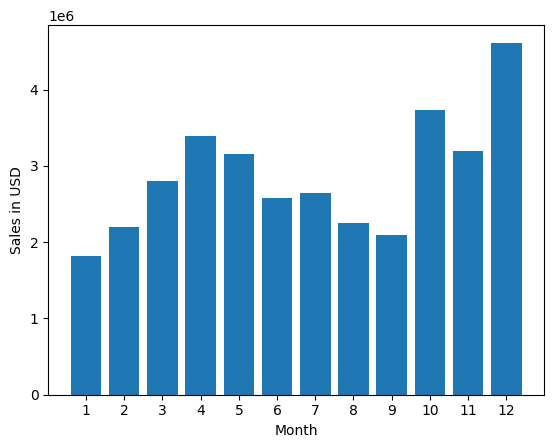

In [17]:
months = range(1,13)
plt.bar(x=months, height=sale_value, align='center')
plt.xticks(months)
plt.xlabel('Month')
plt.ylabel('Sales in USD')
plt.show()

## Task 3.2 : What city has the best sales

In [18]:
df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,141234,iPhone,1,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,700.000000
1,141235,Lightning Charging Cable,1,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,14.950000
2,141236,Wired Headphones,2,11.990000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,23.980000
3,141237,27in FHD Monitor,1,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,149.990005
4,141238,Wired Headphones,1,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,11.990000
5,141239,AAA Batteries (4-pack),1,2.990000,01/29/19 20:22,"775 Willow St, San Francisco, CA 94016",01,2.990000
6,141240,27in 4K Gaming Monitor,1,389.989990,01/26/19 12:16,"979 Park St, Los Angeles, CA 90001",01,389.989990
7,141241,USB-C Charging Cable,1,11.950000,01/05/19 12:04,"181 6th St, San Francisco, CA 94016",01,11.950000
8,141242,Bose SoundSport Headphones,1,99.989998,01/01/19 10:30,"867 Willow St, Los Angeles, CA 90001",01,99.989998
9,141243,Apple Airpods Headphones,1,150.000000,01/22/19 21:20,"657 Johnson St, San Francisco, CA 94016",01,150.000000


In [19]:
df['City'] = df['Purchase Address'].str.split(",",expand=True)[1]
df

C:\Users\ngocc\AppData\Local\Temp\ipykernel_20280\3828920749.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['City'] = df['Purchase Address'].str.split(",",expand=True)[1]


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,141234,iPhone,1,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,700.000000,Boston
1,141235,Lightning Charging Cable,1,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,14.950000,Portland
2,141236,Wired Headphones,2,11.990000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,23.980000,San Francisco
3,141237,27in FHD Monitor,1,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,149.990005,Los Angeles
4,141238,Wired Headphones,1,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,11.990000,Austin
...,...,...,...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.990000,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09,8.970000,Los Angeles
11682,259354,iPhone,1,700.000000,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09,700.000000,San Francisco
11683,259355,iPhone,1,700.000000,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09,700.000000,San Francisco
11684,259356,34in Ultrawide Monitor,1,379.989990,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09,379.989990,San Francisco


In [20]:
City_sales = df.groupby('City').sum('Sales')['Sales']
City_sales.sort_values(ascending=False)

City
San Francisco    8262204.00
Los Angeles      5452571.00
New York City    4664317.50
Boston           3661642.00
Atlanta          2795498.50
Dallas           2767975.50
Seattle          2747755.50
Portland         2320490.50
Austin           1819581.75
Name: Sales, dtype: float32

In [21]:
City_sales.max()

8262204.0

In [22]:
cities = []
for city, sales in City_sales.items() :
    cities.append(city)
print(cities)

[' Atlanta', ' Austin', ' Boston', ' Dallas', ' Los Angeles', ' New York City', ' Portland', ' San Francisco', ' Seattle']


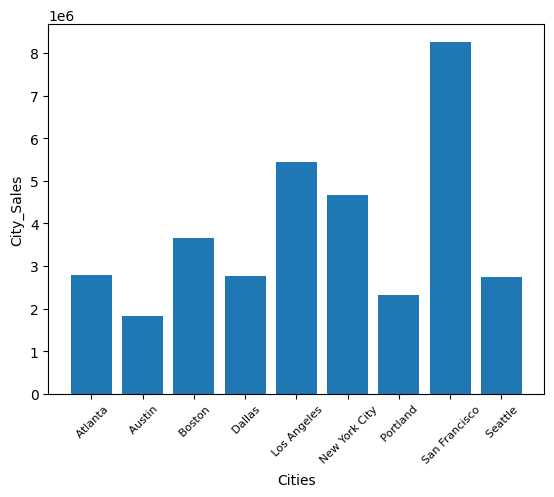

In [23]:
plt.bar(x= cities, height=City_sales, align='center')
plt.xticks(cities, rotation = 45, size = 8 )
plt.xlabel('Cities')
plt.ylabel('City_Sales')
plt.show()

## Task 3.3 : What time should we display ads to maximize the likelihood of customer's buying product?

In [24]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,141234,iPhone,1,700.000000,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,700.000000,Boston
1,141235,Lightning Charging Cable,1,14.950000,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,14.950000,Portland
2,141236,Wired Headphones,2,11.990000,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,23.980000,San Francisco
3,141237,27in FHD Monitor,1,149.990005,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,149.990005,Los Angeles
4,141238,Wired Headphones,1,11.990000,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,11.990000,Austin


In [27]:
print(df['Order Date'].dtype)

object


In [42]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.head()


C:\Users\ngocc\AppData\Local\Temp\ipykernel_20280\1044256253.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Order Date'] = pd.to_datetime(df['Order Date'])


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Order DateTime
0,141234,iPhone,1,700.000000,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",01,700.000000,Boston,21:25:00
1,141235,Lightning Charging Cable,1,14.950000,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",01,14.950000,Portland,14:15:00
2,141236,Wired Headphones,2,11.990000,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",01,23.980000,San Francisco,13:33:00
3,141237,27in FHD Monitor,1,149.990005,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",01,149.990005,Los Angeles,20:33:00
4,141238,Wired Headphones,1,11.990000,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",01,11.990000,Austin,11:59:00


In [44]:
df['Hour'] = df['Order Date'].dt.hour

df.head()

C:\Users\ngocc\AppData\Local\Temp\ipykernel_20280\3670712917.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hour'] = df['Order Date'].dt.hour


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Order DateTime,Hour
0,141234,iPhone,1,700.000000,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",01,700.000000,Boston,21:25:00,21
1,141235,Lightning Charging Cable,1,14.950000,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",01,14.950000,Portland,14:15:00,14
2,141236,Wired Headphones,2,11.990000,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",01,23.980000,San Francisco,13:33:00,13
3,141237,27in FHD Monitor,1,149.990005,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",01,149.990005,Los Angeles,20:33:00,20
4,141238,Wired Headphones,1,11.990000,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",01,11.990000,Austin,11:59:00,11


In [88]:
del df['Hour']

In [89]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hours
0,141234,iPhone,1,700.000000,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",01,700.000000,Boston,21
1,141235,Lightning Charging Cable,1,14.950000,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",01,14.950000,Portland,14
2,141236,Wired Headphones,2,11.990000,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",01,23.980000,San Francisco,13
3,141237,27in FHD Monitor,1,149.990005,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",01,149.990005,Los Angeles,20
4,141238,Wired Headphones,1,11.990000,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",01,11.990000,Austin,11


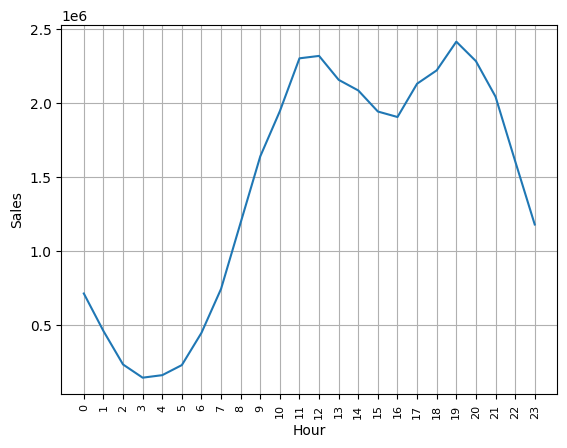

In [102]:
sales_by_hour = df.groupby('Hours')['Sales'].sum()

hour_posted = [hour for hour, sales in sales_by_hour.items()]

plt.plot(hour_posted, sales_by_hour)
plt.grid()
plt.xticks(hour_posted, rotation = 90, size = 8 )
plt.xlabel('Hour')
plt.ylabel('Sales')
plt.show()

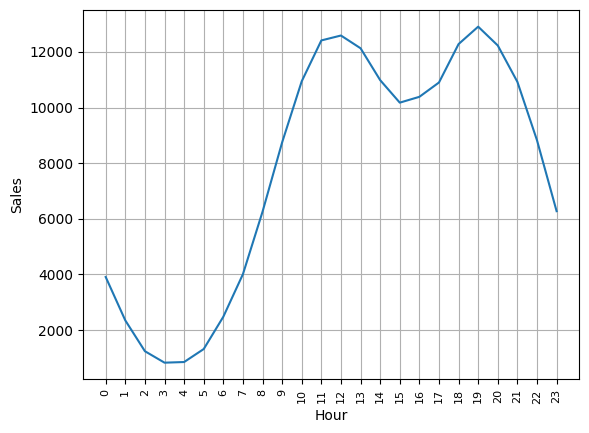

In [103]:
sales_by_hour = df.groupby('Hours')['Sales'].count()

hour_posted = [hour for hour, sales in sales_by_hour.items()]

plt.plot(hour_posted, sales_by_hour)
plt.grid()
plt.xticks(hour_posted, rotation = 90, size = 8 )
plt.xlabel('Hour')
plt.ylabel('Sales')
plt.show()

## Task 3.4 what products are most often sold together

In [109]:
df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hours
0,141234,iPhone,1,700.000000,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",01,700.000000,Boston,21
1,141235,Lightning Charging Cable,1,14.950000,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",01,14.950000,Portland,14
2,141236,Wired Headphones,2,11.990000,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",01,23.980000,San Francisco,13
3,141237,27in FHD Monitor,1,149.990005,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",01,149.990005,Los Angeles,20
4,141238,Wired Headphones,1,11.990000,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",01,11.990000,Austin,11
5,141239,AAA Batteries (4-pack),1,2.990000,2019-01-29 20:22:00,"775 Willow St, San Francisco, CA 94016",01,2.990000,San Francisco,20
6,141240,27in 4K Gaming Monitor,1,389.989990,2019-01-26 12:16:00,"979 Park St, Los Angeles, CA 90001",01,389.989990,Los Angeles,12
7,141241,USB-C Charging Cable,1,11.950000,2019-01-05 12:04:00,"181 6th St, San Francisco, CA 94016",01,11.950000,San Francisco,12
8,141242,Bose SoundSport Headphones,1,99.989998,2019-01-01 10:30:00,"867 Willow St, Los Angeles, CA 90001",01,99.989998,Los Angeles,10
9,141243,Apple Airpods Headphones,1,150.000000,2019-01-22 21:20:00,"657 Johnson St, San Francisco, CA 94016",01,150.000000,San Francisco,21


In [115]:
order_dup = df[df['Order ID'].duplicated(keep = False)]
order_dup.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hours
41,141275,USB-C Charging Cable,1,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",01,11.95,Austin,16
42,141275,Wired Headphones,1,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",01,11.99,Austin,16
57,141290,Apple Airpods Headphones,1,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",01,150.00,Los Angeles,8
58,141290,AA Batteries (4-pack),3,3.84,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",01,11.52,Los Angeles,8
133,141365,Vareebadd Phone,1,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",01,400.00,New York City,11
